In [1]:
from pathlib import Path
import torchvision.models as models
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor
import numpy as np
from torch_lr_finder import LRFinder
import os

  pip install torch-lr-finder -v --global-option="amp"


In [2]:
import pixiedust
import torch
from torch import nn
import pathlib
from torch.utils.data import DataLoader
from torchvision import *

Pixiedust database opened successfully


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
torch.cuda.empty_cache()

In [5]:
transformtrain= transforms.Compose([
    transforms.Resize((124,124)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),              #convert the value to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])         # convert all the value form -1 to 1 for all RGB
])

In [6]:
transformvalid= transforms.Compose([
    transforms.Resize((124,124)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    #convert the value to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])         # convert all the value form -1 to 1 for all RGB
])

In [7]:
model =models.resnext50_32x4d(pretrained=True).to(device)

In [8]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [9]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [14]:
traindata=datasets.ImageFolder('seg_train/seg_train' , transform=transformtrain)

2

In [ ]:
valdata=datasets.ImageFolder('seg_test/seg_test', transform=transformvalid)

In [31]:
trainloader=DataLoader(traindata, batch_size=64, shuffle=True)

In [37]:
a,b=(next(iter(trainloader)))

In [38]:
type(a)

torch.Tensor

In [39]:
a.size()

torch.Size([64, 3, 124, 124])

In [40]:
type(next(iter(trainloader)))

list

In [ ]:
valloader=DataLoader(valdata,batch_size=64,shuffle=True)

In [ ]:
len(valloader)

In [15]:
classes=['buildings','forest','glacier','mountain','sea','street']

In [16]:
noclass=len(classes)

In [ ]:

for param in model.parameters():
    param.requires_grad=False

In [ ]:
# for param in model.parameters():
#     print(param)

In [ ]:
model

In [ ]:
model.fc=nn.Linear(2048,6).to(device)

criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.0000001)

In [ ]:
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=150, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [ ]:
# optimizer=torch.optim.Adam(model.parameters(),lr=0.00001)
# lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
# lr_finder.range_test(trainloader, val_loader=valloader, end_lr=100, num_iter=100, step_mode="linear")
# lr_finder.plot(log_lr=False)
# lr_finder.reset()

In [8]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.0004)

NameError: name 'model' is not defined

In [9]:
optimizer.zero_grad()

NameError: name 'optimizer' is not defined

In [ ]:
def accuracy(out, yb): 
    return (torch.argmax(out, dim=1)==yb).float().mean()
#%%pixie_debugger

In [ ]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    tloss=[]
    vloss=[]
    
    for epoch in range(epochs):
        # Handle batchnorm / dropout
        model.train()
        tot_train=0
        model.train()
#         print(model.training)
        for xb,yb in train_dl:
            xb, yb = xb.to(device), yb.to(device)
            loss = loss_func(model(xb), yb)
            tot_train+=loss
            loss.backward()
            opt.step()
            opt.zero_grad()
        nt=len(train_dl)
        
        
        
        model.eval()
#         print(model.training)
        with torch.no_grad():
            tot_loss,tot_acc = 0.,0.
            for xb,yb in valid_dl:
                xb, yb = xb.to(device), yb.to(device)
                pred = model(xb)
                tot_loss += loss_func(pred, yb)
                tot_acc  += accuracy (pred,yb)
        nv = len(valid_dl)
        tloss.append(tot_train/nt)
        vloss.append(tot_loss/nv)
        print(epoch,tot_train/nt, tot_loss/nv, tot_acc/nv)
    return tloss, vloss

In [ ]:
ltrain,lval = fit(5, model, criterion, optimizer, trainloader, valloader)

In [ ]:
plt.plot(ltrain, label='Training loss', color='green')
plt.plot(lval, label='Validation loss', color ='black')
plt.legend(frameon=False)
plt.show()

In [ ]:
PATH="C:/Users/Iconsense/Documents/virat/abhi/save1"
torch.save({
            
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            
            
            }, PATH)

In [ ]:
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
# modelB.load_state_dict(checkpoint['modelB_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# optimizerB.load_state_dict(checkpoint['optimizerB_state_dict'])

# modelA.eval()
# modelB.eval()
# # - or -
model.train()
# modelB.train()

In [ ]:
ltrain,lval = fit(5, model, criterion, optimizer, trainloader, valloader)

In [ ]:
PATH="C:/Users/Iconsense/Documents/virat/abhi/save1"
torch.save({
            
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            
            
            }, PATH)

In [ ]:
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
# modelB.load_state_dict(checkpoint['modelB_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# optimizerB.load_state_dict(checkpoint['optimizerB_state_dict'])

# modelA.eval()
# modelB.eval()
# # - or -
model.train()
# modelB.train()

In [ ]:
plt.plot(ltrain, label='Training loss', color='green')
plt.plot(lval, label='Validation loss', color ='black')
plt.legend(frameon=False)
plt.show()

In [ ]:
from PIL import Image
import numpy as np

In [ ]:

model.eval()

In [ ]:
img = Image.open('seg_pred/seg_pred/3966.jpg')

In [ ]:
nimg = np.array(img)

In [ ]:
plt.imshow(nimg)


In [ ]:
nimg = transformvalid(img).unsqueeze(0).to(device)

In [ ]:
nimg.shape

In [ ]:
prediction = model(nimg)

In [ ]:
_, tpredict = torch.max(prediction.data, 1)

In [ ]:
classes[tpredict[0].item()]

In [ ]:
model.train()

In [ ]:
for param in model.parameters():
    param.requires_grad = True

"""optimizer = torch.optim.Adam([{'params': model.layer4.parameters()},
                {'params': model.layer1.parameters(), 'lr': 1e-2},
                {'params': model.layer2.parameters(), 'lr': 1e-4},
            
            ], lr=1e-1)"""

In [ ]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.00000001)   

In [ ]:
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [ ]:
for param in model.parameters():
    param.requires_grad = True
    
optimizer = torch.optim.Adam([{'params': model.layer4.parameters()},
                {'params': model.layer1.parameters(), 'lr': 6e-7},
                 {'params': model.layer2.parameters(), 'lr': 1e-6},
                {'params': model.layer3.parameters(), 'lr': 5e-6}
            ], lr=1e-5)

In [ ]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    tloss=[]
    vloss=[]
    
    for epoch in range(epochs):
        # Handle batchnorm / dropout
        model.train()
        tot_train=0
#         print(model.training)
        for xb,yb in train_dl:
            xb, yb = xb.to(device), yb.to(device)
            loss = loss_func(model(xb), yb)
            tot_train+=loss
            loss.backward()
            opt.step()
            opt.zero_grad()
        nt=len(train_dl)
        
        
        model.eval()
#         print(model.training)
        with torch.no_grad():
            tot_loss,tot_acc = 0.,0.
            for xb,yb in valid_dl:
                xb, yb = xb.to(device), yb.to(device)
                pred = model(xb)
                tot_loss += loss_func(pred, yb)
                tot_acc  += accuracy (pred,yb)
        nv = len(valid_dl)
        tloss.append(tot_train/nt)
        vloss.append(tot_loss/nv)
        print(epoch,tot_train/nt, tot_loss/nv, tot_acc/nv)
    return tloss, vloss

In [ ]:
ltrain,lval = fit(6, model, criterion, optimizer, trainloader, valloader)

In [ ]:
PATH="C:/Users/Iconsense/Documents/virat/abhi/save2"
torch.save({
            
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            
            
            }, PATH)

In [ ]:
# criterion = nn.CrossEntropyLoss()
# optimizer=torch.optim.Adam(model.parameters(),lr=0.000001)
# lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
# lr_finder.range_test(trainloader, val_loader=valloader, end_lr=1, num_iter=100, step_mode="linear")
# lr_finder.plot(log_lr=False)
# lr_finder.reset()

In [ ]:
# for param in model.features.parameters():
#     param.requires_grad = True
    
# optimizer = torch.optim.Adam([{'params': model.classifier.parameters()},
#                 {'params': model.features.parameters(), 'lr': 0.00001}
#             ], lr=0.002)

In [ ]:

plt.plot(ltrain, label='Training loss', color='green')
plt.plot(lval, label='Validation loss', color ='black')
plt.legend(frameon=False)
plt.show()

# Progrssive resizing 

In [102]:
model =models.resnext50_32x4d().to(device)

In [103]:
model.fc=nn.Linear(2048,6).to(device)

criterion=nn.CrossEntropyLoss()

In [104]:

for param in model.parameters():
    param.requires_grad=True

In [105]:

optimizer = torch.optim.Adam([{'params': model.layer4.parameters()},
                {'params': model.layer1.parameters(), 'lr': 6e-7},
                 {'params': model.layer2.parameters(), 'lr': 1e-6},
                {'params': model.layer3.parameters(), 'lr': 5e-6}
            ], lr=1e-5)

In [106]:
PATH="C:/Users/Iconsense/Documents/virat/abhi/save2"

In [107]:
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
# modelB.load_state_dict(checkpoint['modelB_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# optimizerB.load_state_dict(checkpoint['optimizerB_state_dict'])

# modelA.eval()
# modelB.eval()
# # - or -
model.train()
# modelB.train()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [108]:
for param in model.parameters():
    param.requires_grad=False

In [109]:
for param in model.fc.parameters():
    print(param.shape)
    param.requires_grad=True

torch.Size([6, 2048])
torch.Size([6])


# Progressive resizing 

In [110]:
transformtrain= transforms.Compose([
    transforms.Resize((250,250)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),              #convert the value to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])         # convert all the value form -1 to 1 for all RGB
])

In [111]:
transformvalid= transforms.Compose([
    transforms.Resize((250,250)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    #convert the value to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])         # convert all the value form -1 to 1 for all RGB
])

In [118]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.0000001)

In [116]:
traindata=datasets.ImageFolder('seg_train/seg_train' , transform=transformtrain)

In [114]:
valdata=datasets.ImageFolder('seg_test/seg_test', transform=transformvalid)

In [35]:
trainloader=DataLoader(traindata, batch_size=32, shuffle=True)

In [36]:
valloader=DataLoader(valdata,batch_size=32,shuffle=True)

In [37]:
"""for param in model.parameters():
    param.requires_grad = True
    
optimizer = torch.optim.Adam([{'params': model.layer4.parameters()},
                {'params': model.layer1.parameters(), 'lr': 6e-7},
                 {'params': model.layer2.parameters(), 'lr': 1e-6},
                {'params': model.layer3.parameters(), 'lr': 5e-6}
            ], lr=1e-5)"""

"for param in model.parameters():\n    param.requires_grad = True\n    \noptimizer = torch.optim.Adam([{'params': model.layer4.parameters()},\n                {'params': model.layer1.parameters(), 'lr': 6e-7},\n                 {'params': model.layer2.parameters(), 'lr': 1e-6},\n                {'params': model.layer3.parameters(), 'lr': 5e-6}\n            ], lr=1e-5)"

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


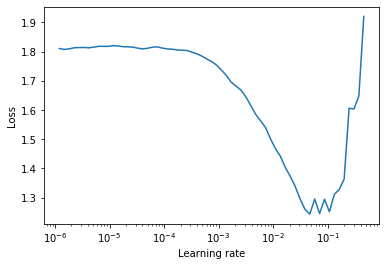

In [38]:
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [42]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.0001)

In [43]:
optimizer.zero_grad()

In [44]:
def accuracy(out, yb): 
    return (torch.argmax(out, dim=1)==yb).float().mean()
#%%pixie_debugger

In [45]:
# def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
#     tloss=[]
#     vloss=[]
    
#     for epoch in range(epochs):
#         # Handle batchnorm / dropout
#         model.train()
#         tot_train=0
#         model.train()
# #         print(model.training)
#         for xb,yb in train_dl:
#             xb, yb = xb.to(device), yb.to(device)
#             loss = loss_func(model(xb), yb)
#             tot_train+=loss
#             loss.backward()
#             opt.step()
#             opt.zero_grad()
#         nt=len(train_dl)
        
        
        
#         model.eval()
# #         print(model.training)
#         with torch.no_grad():
#             tot_loss,tot_acc = 0.,0.
#             for xb,yb in valid_dl:
#                 xb, yb = xb.to(device), yb.to(device)
#                 pred = model(xb)
#                 tot_loss += loss_func(pred, yb)
#                 tot_acc  += accuracy (pred,yb)
#         nv = len(valid_dl)
#         tloss.append(tot_train/nt)
#         vloss.append(tot_loss/nv)
#         print(epoch,tot_train/nt, tot_loss/nv, tot_acc/nv)
#     return tloss, vloss

In [46]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    tloss=[]
    vloss=[]
    
    for epoch in range(epochs):
        # Handle batchnorm / dropout
        model.train()
        tot_train=0
        tot_acc_train=0
#         print(model.training)
        for xb,yb in train_dl:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            loss = loss_func(pred, yb)
            
            tot_acc_train+= accuracy (pred,yb)
            tot_train+=loss
            loss.backward()
            opt.step()
            opt.zero_grad()
        nt=len(train_dl)
        
        
        model.eval()
#         print(model.training)
        with torch.no_grad():
            tot_loss,tot_acc_val = 0.,0.
            for xb,yb in valid_dl:
                xb, yb = xb.to(device), yb.to(device)
                pred = model(xb)
                tot_loss += loss_func(pred, yb)
                tot_acc_val  += accuracy (pred,yb)
        nv = len(valid_dl)
        tloss.append(tot_train/nt)
        vloss.append(tot_loss/nv)
        
        print("ep: "+str(epoch)+" train loss: "+str(tot_train/nt)+ " val loss: "+str(tot_loss/nv)
              +"Train Acc: "+str(tot_acc_train/nt) +"Val Acc: "+ str(tot_acc_val/nv))
    return tloss, vloss

In [47]:
ltrain,lval = fit(5, model, criterion, optimizer, trainloader, valloader)

ep: 0 train loss: tensor(0.9256, device='cuda:0', grad_fn=<DivBackward0>) val loss: tensor(0.5314, device='cuda:0')Train Acc: tensor(0.7741, device='cuda:0')Val Acc: tensor(0.8790, device='cuda:0')
ep: 1 train loss: tensor(0.4795, device='cuda:0', grad_fn=<DivBackward0>) val loss: tensor(0.3825, device='cuda:0')Train Acc: tensor(0.8729, device='cuda:0')Val Acc: tensor(0.8944, device='cuda:0')
ep: 2 train loss: tensor(0.3855, device='cuda:0', grad_fn=<DivBackward0>) val loss: tensor(0.3266, device='cuda:0')Train Acc: tensor(0.8831, device='cuda:0')Val Acc: tensor(0.8999, device='cuda:0')
ep: 3 train loss: tensor(0.3444, device='cuda:0', grad_fn=<DivBackward0>) val loss: tensor(0.3034, device='cuda:0')Train Acc: tensor(0.8890, device='cuda:0')Val Acc: tensor(0.9061, device='cuda:0')
ep: 4 train loss: tensor(0.3196, device='cuda:0', grad_fn=<DivBackward0>) val loss: tensor(0.2874, device='cuda:0')Train Acc: tensor(0.8965, device='cuda:0')Val Acc: tensor(0.9053, device='cuda:0')


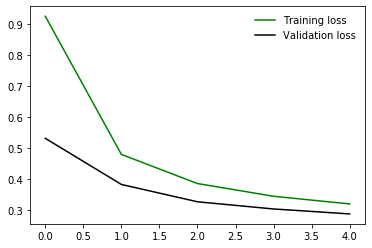

In [48]:
plt.plot(ltrain, label='Training loss', color='green')
plt.plot(lval, label='Validation loss', color ='black')
plt.legend(frameon=False)
plt.show()

In [49]:
PATH="C:/Users/Iconsense/Documents/virat/abhi/saveprogresive"
torch.save({
            
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            
            
            }, PATH)

In [50]:
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
# modelB.load_state_dict(checkpoint['modelB_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# optimizerB.load_state_dict(checkpoint['optimizerB_state_dict'])

# modelA.eval()
# modelB.eval()
# # - or -
model.train()
# modelB.train()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [51]:
for param in model.parameters():
    param.requires_grad = True

In [57]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.000001)   

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


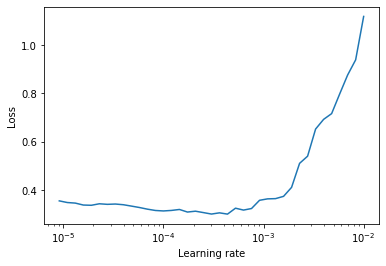

In [59]:
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [ ]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    tloss=[]
    vloss=[]
    
    for epoch in range(epochs):
        # Handle batchnorm / dropout
        model.train()
        tot_train=0
        tot_acc_train=0
#         print(model.training)
        for xb,yb in train_dl:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            loss = loss_func(pred, yb)
            
            tot_acc_train+= accuracy (pred,yb)
            tot_train+=loss
            loss.backward()
            opt.step()
            opt.zero_grad()
        nt=len(train_dl)
        
        
        model.eval()
#         print(model.training)
        with torch.no_grad():
            tot_loss,tot_acc_val = 0.,0.
            for xb,yb in valid_dl:
                xb, yb = xb.to(device), yb.to(device)
                pred = model(xb)
                tot_loss += loss_func(pred, yb)
                tot_acc_val  += accuracy (pred,yb)
        nv = len(valid_dl)
        tloss.append(tot_train/nt)
        vloss.append(tot_loss/nv)
        
        print("ep: "+str(epoch)+" train loss: "+str(tot_train/nt)+ " val loss: "+str(tot_loss/nv)
              +"Train Acc: "+str(tot_acc_train/nt) +"Val Acc: "+ str(tot_acc_val/nv))
    return tloss, vloss

In [68]:
optimizer = torch.optim.Adam([{'params': model.layer4.parameters()},
                {'params': model.layer1.parameters(), 'lr': 1e-7},
                 {'params': model.layer2.parameters(), 'lr': 6e-7},
                {'params': model.layer3.parameters(), 'lr': 1e-5}
            ], lr=1e-5)

In [70]:
ltrain,lval = fit(1, model, criterion, optimizer, trainloader, valloader)

ep: 0 train loss: tensor(0.0042, device='cuda:0', grad_fn=<DivBackward0>) val loss: tensor(0.2435, device='cuda:0')Train Acc: tensor(0.9991, device='cuda:0')Val Acc: tensor(0.9422, device='cuda:0')


In [74]:
PATH="C:/Users/Iconsense/Documents/virat/abhi/saveprogrssive2"
torch.save({
            
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            
            
            }, PATH)

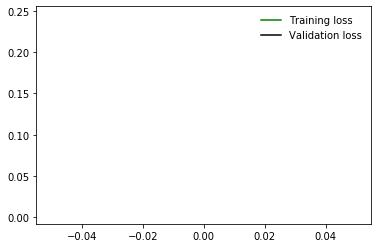

In [75]:
plt.plot(ltrain, label='Training loss', color='green')
plt.plot(lval, label='Validation loss', color ='black')
plt.legend(frameon=False)
plt.show()